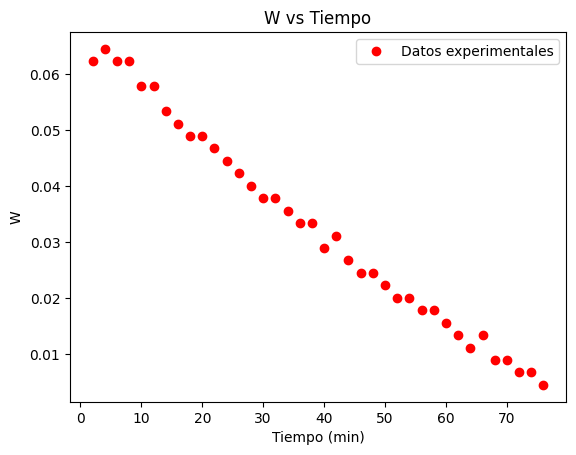

,Tiempo (min) Original,dW_dt Original,W Original
0,4.0,-0.001111,0.064444
1,6.0,0.001111,0.062222
2,8.0,0.000000,0.062222
3,10.0,0.002222,0.057778
4,12.0,0.000000,0.057778
5,14.0,0.002222,0.053333
6,16.0,0.001111,0.051111
7,18.0,0.001111,0.048889
8,20.0,0.000000,0.048889
9,22.0,0.001111,0.046667


,Tiempo (min) Filtrado,dW_dt Filtrado,W Filtrado
0,6.0,0.001111,0.062222
1,8.0,0.000000,0.062222
2,10.0,0.002222,0.057778
3,12.0,0.000000,0.057778
4,14.0,0.002222,0.053333
5,16.0,0.001111,0.051111
6,18.0,0.001111,0.048889
7,20.0,0.000000,0.048889
8,22.0,0.001111,0.046667
9,24.0,0.001111,0.044444


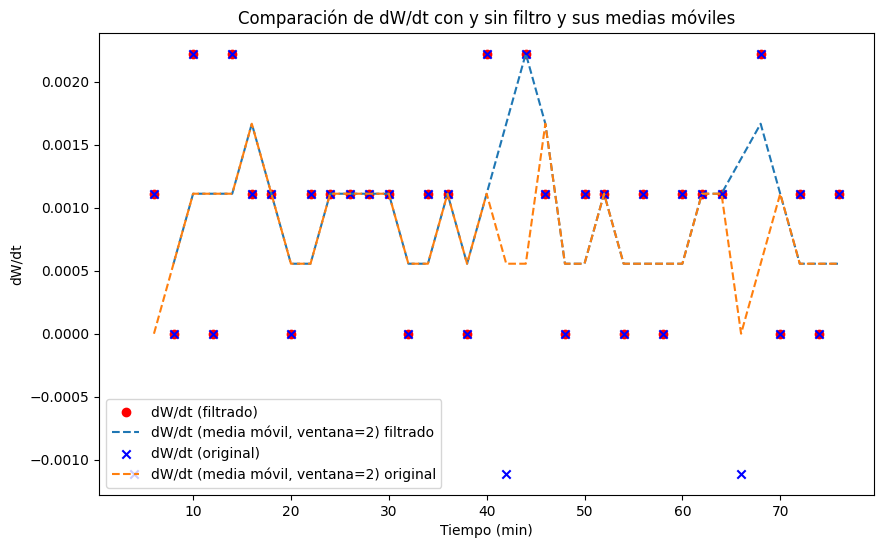

Valor constante encontrado para rc: 0.0005555555555555557


,Tiempo (min),Defect
0,2.0,-1.574036
1,4.0,-1.765091
2,6.0,-1.574036
3,8.0,-1.574036
4,10.0,-1.275543
5,12.0,-1.275543
6,14.0,-1.045969
7,16.0,-0.948330
8,18.0,-0.859383
9,20.0,-0.859383


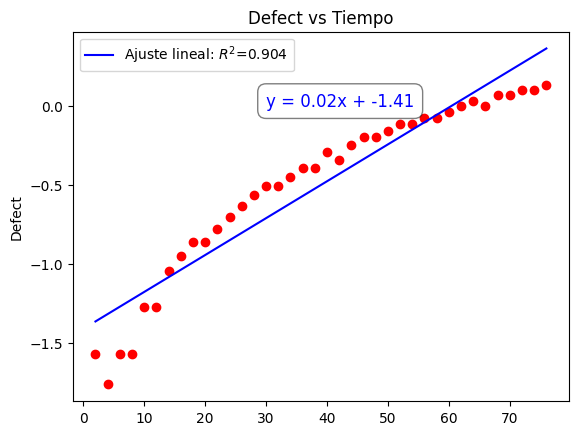

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

# Datos



datos = np.array([1028, 1029, 1028, 1028, 1026, 1026, 1024, 1023, 1022, 1022, 1021, 1020, 1019, 1018, 1017, 1017, 1016, 1015, 1015, 1013, 1014, 1012, 1011, 1011, 1010, 1009, 1009, 1008, 1008, 1007, 1006, 1005, 1006, 1004,1004,1003,1003,1002])
longitud = len(datos)
T = np.array([120 * (i + 1) for i in range(len(datos))])
T_min = T / 60  # tiempo en minutos


# Parámetros
we = 0.075
Di = 0.0676  # m²
De = 8 / 1000  # m de espesor
L = 0.25  # m de longitud de bandeja
A = 0.0271  # m² de área de bandeja
mb = 275 * 2  # g de masa de bandeja
msepiolita = 450  # g de masa de sepiolita
mini = 1028  # g
mh20 = datos - (msepiolita + mb)

# Relación de masa de agua a sepiolita
W = mh20 / msepiolita
w0 = W[0]

# Temperatura
Temp = np.array([25, 25, 25, 25, 25, 25, 25, 25, 25, 25]) + 273.15  # K

# Gráfica
plt.plot(T_min, W, 'ro', label="Datos experimentales")
plt.xlabel('Tiempo (min)')
plt.ylabel('W')
plt.title('W vs Tiempo')
plt.legend()
plt.show()
# Calcular dW/dt
dW_dt = []
for i in range(len(T_min) - 1):  # Iterar hasta el penúltimo índice
    Delta_w = W[i + 1] - W[i]
    Delta_t = T_min[i + 1] - T_min[i]
    dW_dt.append(-(Delta_w / Delta_t))  # Añadir el valor calculado a la lista

# Convertir dW/dt a un array de NumPy
dW_dt = np.array(dW_dt)
tolerancia = 1e-8  # Define la tolerancia
dW_dt[np.isclose(dW_dt, 0, atol=tolerancia)] = 0

# Aplicar la máscara a los tres arrays para filtrar los valores negativos de dW/dt
mascara = dW_dt >= 0  # Crear una máscara para valores positivos o cero
dW_dt_filtrado = dW_dt[mascara]  # Filtrar los valores de dW/dt
T_min_filtrado = T_min[1:][mascara]  # Filtrar también los tiempos correspondientes
W_filtrado = W[1:][mascara]  # Filtrar los valores de W correspondientes

# Establecer tolerancia para valores cercanos a cero
tolerancia = 1e-8
dW_dt_filtrado[np.isclose(dW_dt_filtrado, 0, atol=tolerancia)] = 0

# Crear el DataFrame con los valores filtrados y originales
df = pd.DataFrame({
    'Tiempo (min) Original': T_min[1:],  # Usar los tiempos originales
    'dW_dt Original': dW_dt,  # Usar los valores originales de dW/dt
    'W Original': W[1:]  # Usar los valores originales de W
})

df_filtrado = pd.DataFrame({
    'Tiempo (min) Filtrado': T_min_filtrado,  # Usar los tiempos filtrados
    'dW_dt Filtrado': dW_dt_filtrado,  # Usar los valores filtrados de dW/dt
    'W Filtrado': W_filtrado  # Usar los valores filtrados de W
})
# Mostrar el DataFrame
display(df)
display(df_filtrado)

# Media móvil para datos originales
window_size = 2
rolling_mean_original = pd.Series(dW_dt).rolling(window=window_size, center=True).mean()

# Media móvil para datos filtrados
rolling_mean_filtrado = pd.Series(dW_dt_filtrado).rolling(window=window_size, center=True).mean()

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(T_min_filtrado, dW_dt_filtrado, label='dW/dt (filtrado)', marker='o', color='r')
plt.plot(T_min_filtrado, rolling_mean_filtrado, label=f'dW/dt (media móvil, ventana={window_size}) filtrado', linestyle='--')

plt.scatter(T_min[1:], dW_dt, label='dW/dt (original)', marker='x', color='b')
plt.plot(T_min[1:], rolling_mean_original, label=f'dW/dt (media móvil, ventana={window_size}) original', linestyle='--')

plt.xlabel('Tiempo (min)')
plt.ylabel('dW/dt')
plt.title('Comparación de dW/dt con y sin filtro y sus medias móviles')
plt.legend()
plt.show()


tol = 1e-3
diff = rolling_mean_original.diff().abs()
constant = diff < tol


# Extraer el valor constante
if constant.any():  # Si hay al menos un tramo constante
    rc = rolling_mean_original[constant].iloc[0]  # velocidad de secado en el periodo de velocidad constante
    print(f"Valor constante encontrado para rc: {rc}")
else:
    rc = None
    print("No se encontró ningún tramo constante.")

index = df[df['dW_dt Original']< 0].index
for idx in index:
    tin = df.loc[idx, 'Tiempo (min) Original']
    Wc = W[idx+1]
tc =(w0-Wc)/rc  # tiempo critico

# calculo difusividad efectiva 
Defect = np.log(np.clip((W - we) / (Wc - we), a_min=1e-10, a_max=None))
slope, intercept, r_value, p_value, std_err = linregress(T_min, Defect)
r_squared = r_value**2
df_difusividad = pd.DataFrame({
    'Tiempo (min)': T_min,  
    'Defect': Defect
})
display(df_difusividad)
plt.plot(T_min, Defect, 'ro')  # Puntos rojos
plt.plot(T_min, slope * T_min + intercept, 'b-', label=f'Ajuste lineal: $R^2$={r_squared:.3f}')
# Colocar el texto en una posición personalizada
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(30, 0, equation_text, fontsize=12, color='blue', 
         backgroundcolor='white', bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5'))

plt.ylabel('Defect')
plt.title('Defect vs Tiempo')
plt.legend()
plt.show()

#! meter Tg  que es la media de temperatura del aire ST-4 durante la etapa de velocidad de secado decreciente
#! es decir despues del punto -dw/dt < 0 

Tp = Temp[0] 

# Dg = 5.02e-9 *((Tp+Tg)/2)**1.5
#mu = 4.25e8*Tg+5.87e-6  # viscosidad en pa*s
#rho = 353.33/Tg # densidad en kg/m^3
#delta = De - 
# Demp = slope/np.pi**2/ (4*(delta/1000)**2) # m^2/s